In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

In [115]:
df = pd.read_csv("selected_data.csv")
df

,datetime,humidity,precipMM,pressure,tempC
0,2009-01-01 00:00:00,91,0.0,1014,14
1,2009-01-01 01:00:00,93,0.0,1014,14
2,2009-01-01 02:00:00,94,0.0,1014,13
3,2009-01-01 03:00:00,96,0.0,1014,12
4,2009-01-01 04:00:00,88,0.0,1015,14
...,...,...,...,...,...
96427,2020-01-01 19:00:00,76,0.1,1014,23
96428,2020-01-01 20:00:00,81,0.6,1015,22
96429,2020-01-01 21:00:00,86,0.8,1016,21
96430,2020-01-01 22:00:00,88,0.4,1016,20


In [116]:
df.describe()

,humidity,precipMM,pressure,tempC
count,96432.000000,96432.000000,96432.000000,96432.000000
mean,64.895460,0.077719,1010.554225,23.979810
std,21.856869,0.385865,3.187016,4.540028
min,6.000000,0.000000,1000.000000,0.000000
25%,49.000000,0.000000,1008.000000,21.000000
50%,68.000000,0.000000,1010.000000,23.000000
75%,83.000000,0.000000,1013.000000,27.000000
max,100.000000,16.900000,1021.000000,40.000000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  96432 non-null  object 
 1   humidity  96432 non-null  int64  
 2   precipMM  96432 non-null  float64
 3   pressure  96432 non-null  int64  
 4   tempC     96432 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 3.7+ MB


In [118]:
df['datetime'] = pd.to_datetime(df['datetime'])

df.set_index('datetime', inplace=True)

df_daily = df.resample('D').mean()

df_daily.reset_index(inplace=True)

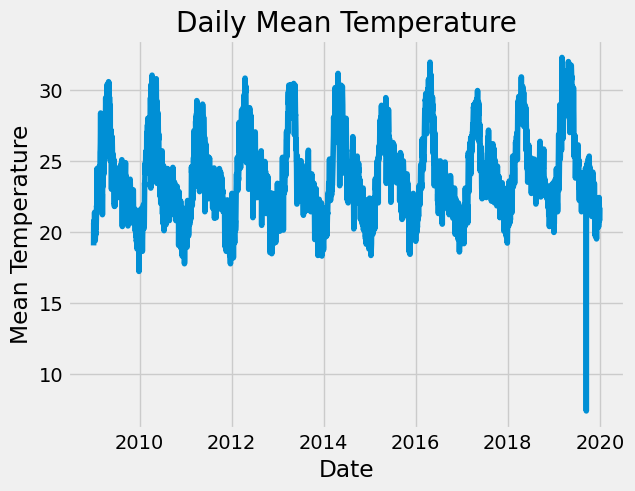

In [119]:
plt.plot(df_daily['datetime'], df_daily['tempC'])
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()


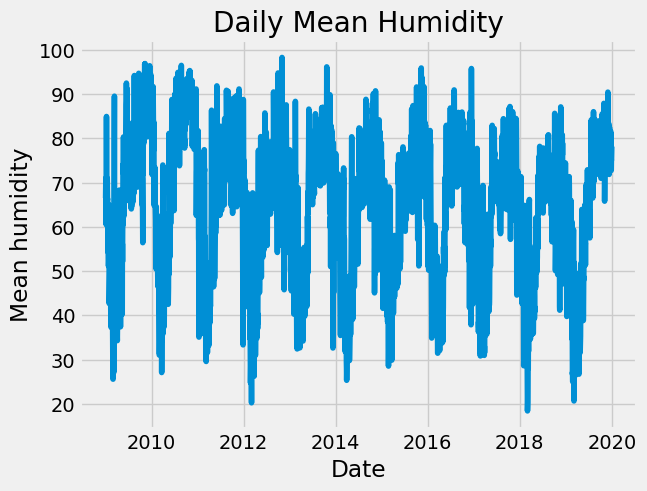

In [120]:
plt.plot(df_daily['datetime'], df_daily['humidity'])
plt.title('Daily Mean Humidity')
plt.xlabel('Date')
plt.ylabel('Mean humidity')
plt.show()


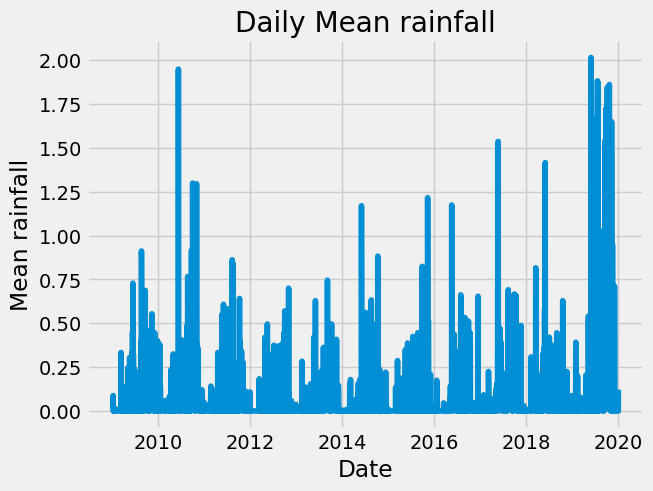

In [121]:
plt.plot(df_daily['datetime'], df_daily['precipMM'])
plt.title('Daily Mean rainfall')
plt.xlabel('Date')
plt.ylabel('Mean rainfall')
plt.show()


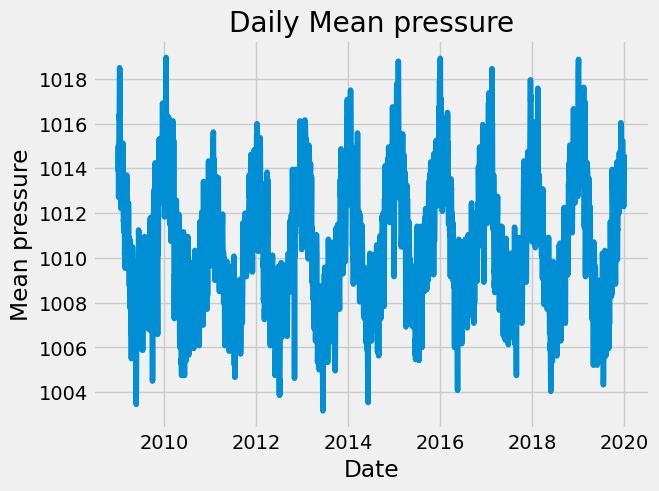

In [122]:
plt.plot(df_daily['datetime'], df_daily['pressure'])
plt.title('Daily Mean pressure')
plt.xlabel('Date')
plt.ylabel('Mean pressure')
plt.show()

In [123]:
y = df_daily['tempC']

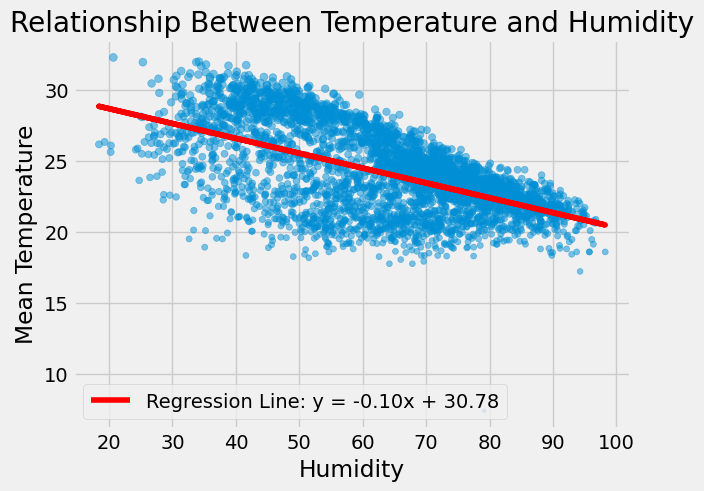

Correlation between tempC and humidity: -0.7759240958547918


In [124]:
x = df_daily['humidity']

slope, intercept, _, _, _ = linregress(x, y)
reg_line = slope * x + intercept
correlation = df['tempC'].corr(df['humidity'])
plt.scatter(x, y, s=df_daily['tempC'], alpha=0.5)
plt.plot(x, reg_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

plt.title('Relationship Between Temperature and Humidity')
plt.xlabel('Humidity')
plt.ylabel('Mean Temperature')
plt.legend()


plt.show()
print(f"Correlation between tempC and humidity: {correlation}")

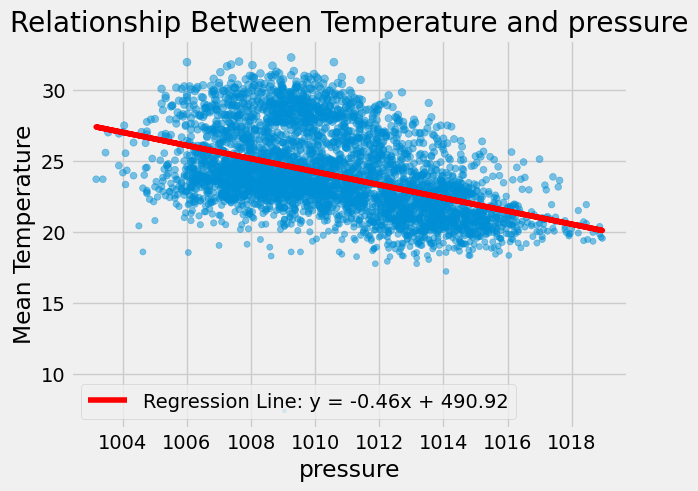

Correlation between tempC and pressure: -0.46765153700335665


In [125]:
x = df_daily['pressure']

slope, intercept, _, _, _ = linregress(x, y)
reg_line = slope * x + intercept
correlation = df['tempC'].corr(df['pressure'])
plt.scatter(x, y, s=df_daily['tempC'], alpha=0.5)
plt.plot(x, reg_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')


plt.title('Relationship Between Temperature and pressure')
plt.xlabel('pressure')
plt.ylabel('Mean Temperature')
plt.legend()


plt.show()
print(f"Correlation between tempC and pressure: {correlation}")

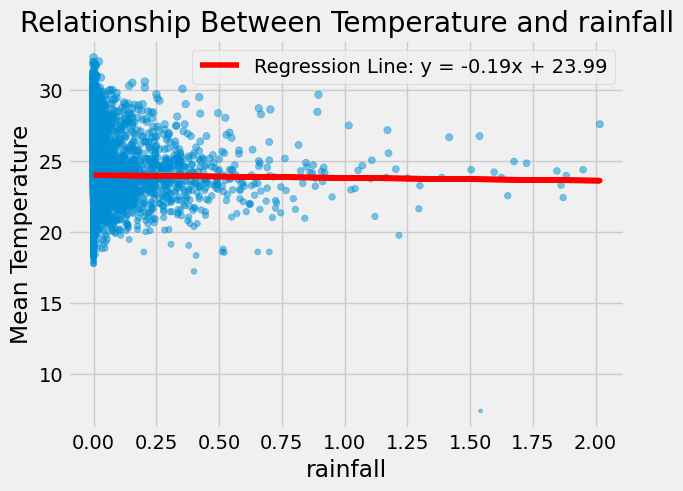

Correlation between tempC and rainfall: -0.010178563278153587


In [126]:
x = df_daily['precipMM']

slope, intercept, _, _, _ = linregress(x, y)
reg_line = slope * x + intercept
correlation = df['tempC'].corr(df['precipMM'])
plt.scatter(x, y, s=df_daily['tempC'], alpha=0.5)
plt.plot(x, reg_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

plt.title('Relationship Between Temperature and rainfall')
plt.xlabel('rainfall')
plt.ylabel('Mean Temperature')
plt.legend()


plt.show()
print(f"Correlation between tempC and rainfall: {correlation}")

In [127]:
df_daily["datetime"] = pd.to_datetime(df_daily["datetime"], format = '%Y-%m-%d')
df_daily['year'] = df_daily["datetime"] .dt.year
df_daily["month"] = df_daily["datetime"] .dt.month
print(df_daily.head())


    datetime   humidity  precipMM     pressure      tempC  year  month
0 2009-01-01  66.500000       0.0  1013.875000  19.041667  2009      1
1 2009-01-02  69.916667       0.0  1014.333333  20.625000  2009      1
2 2009-01-03  71.000000       0.0  1015.000000  20.166667  2009      1
3 2009-01-04  67.291667       0.0  1014.250000  20.791667  2009      1
4 2009-01-05  67.083333       0.0  1012.708333  20.666667  2009      1


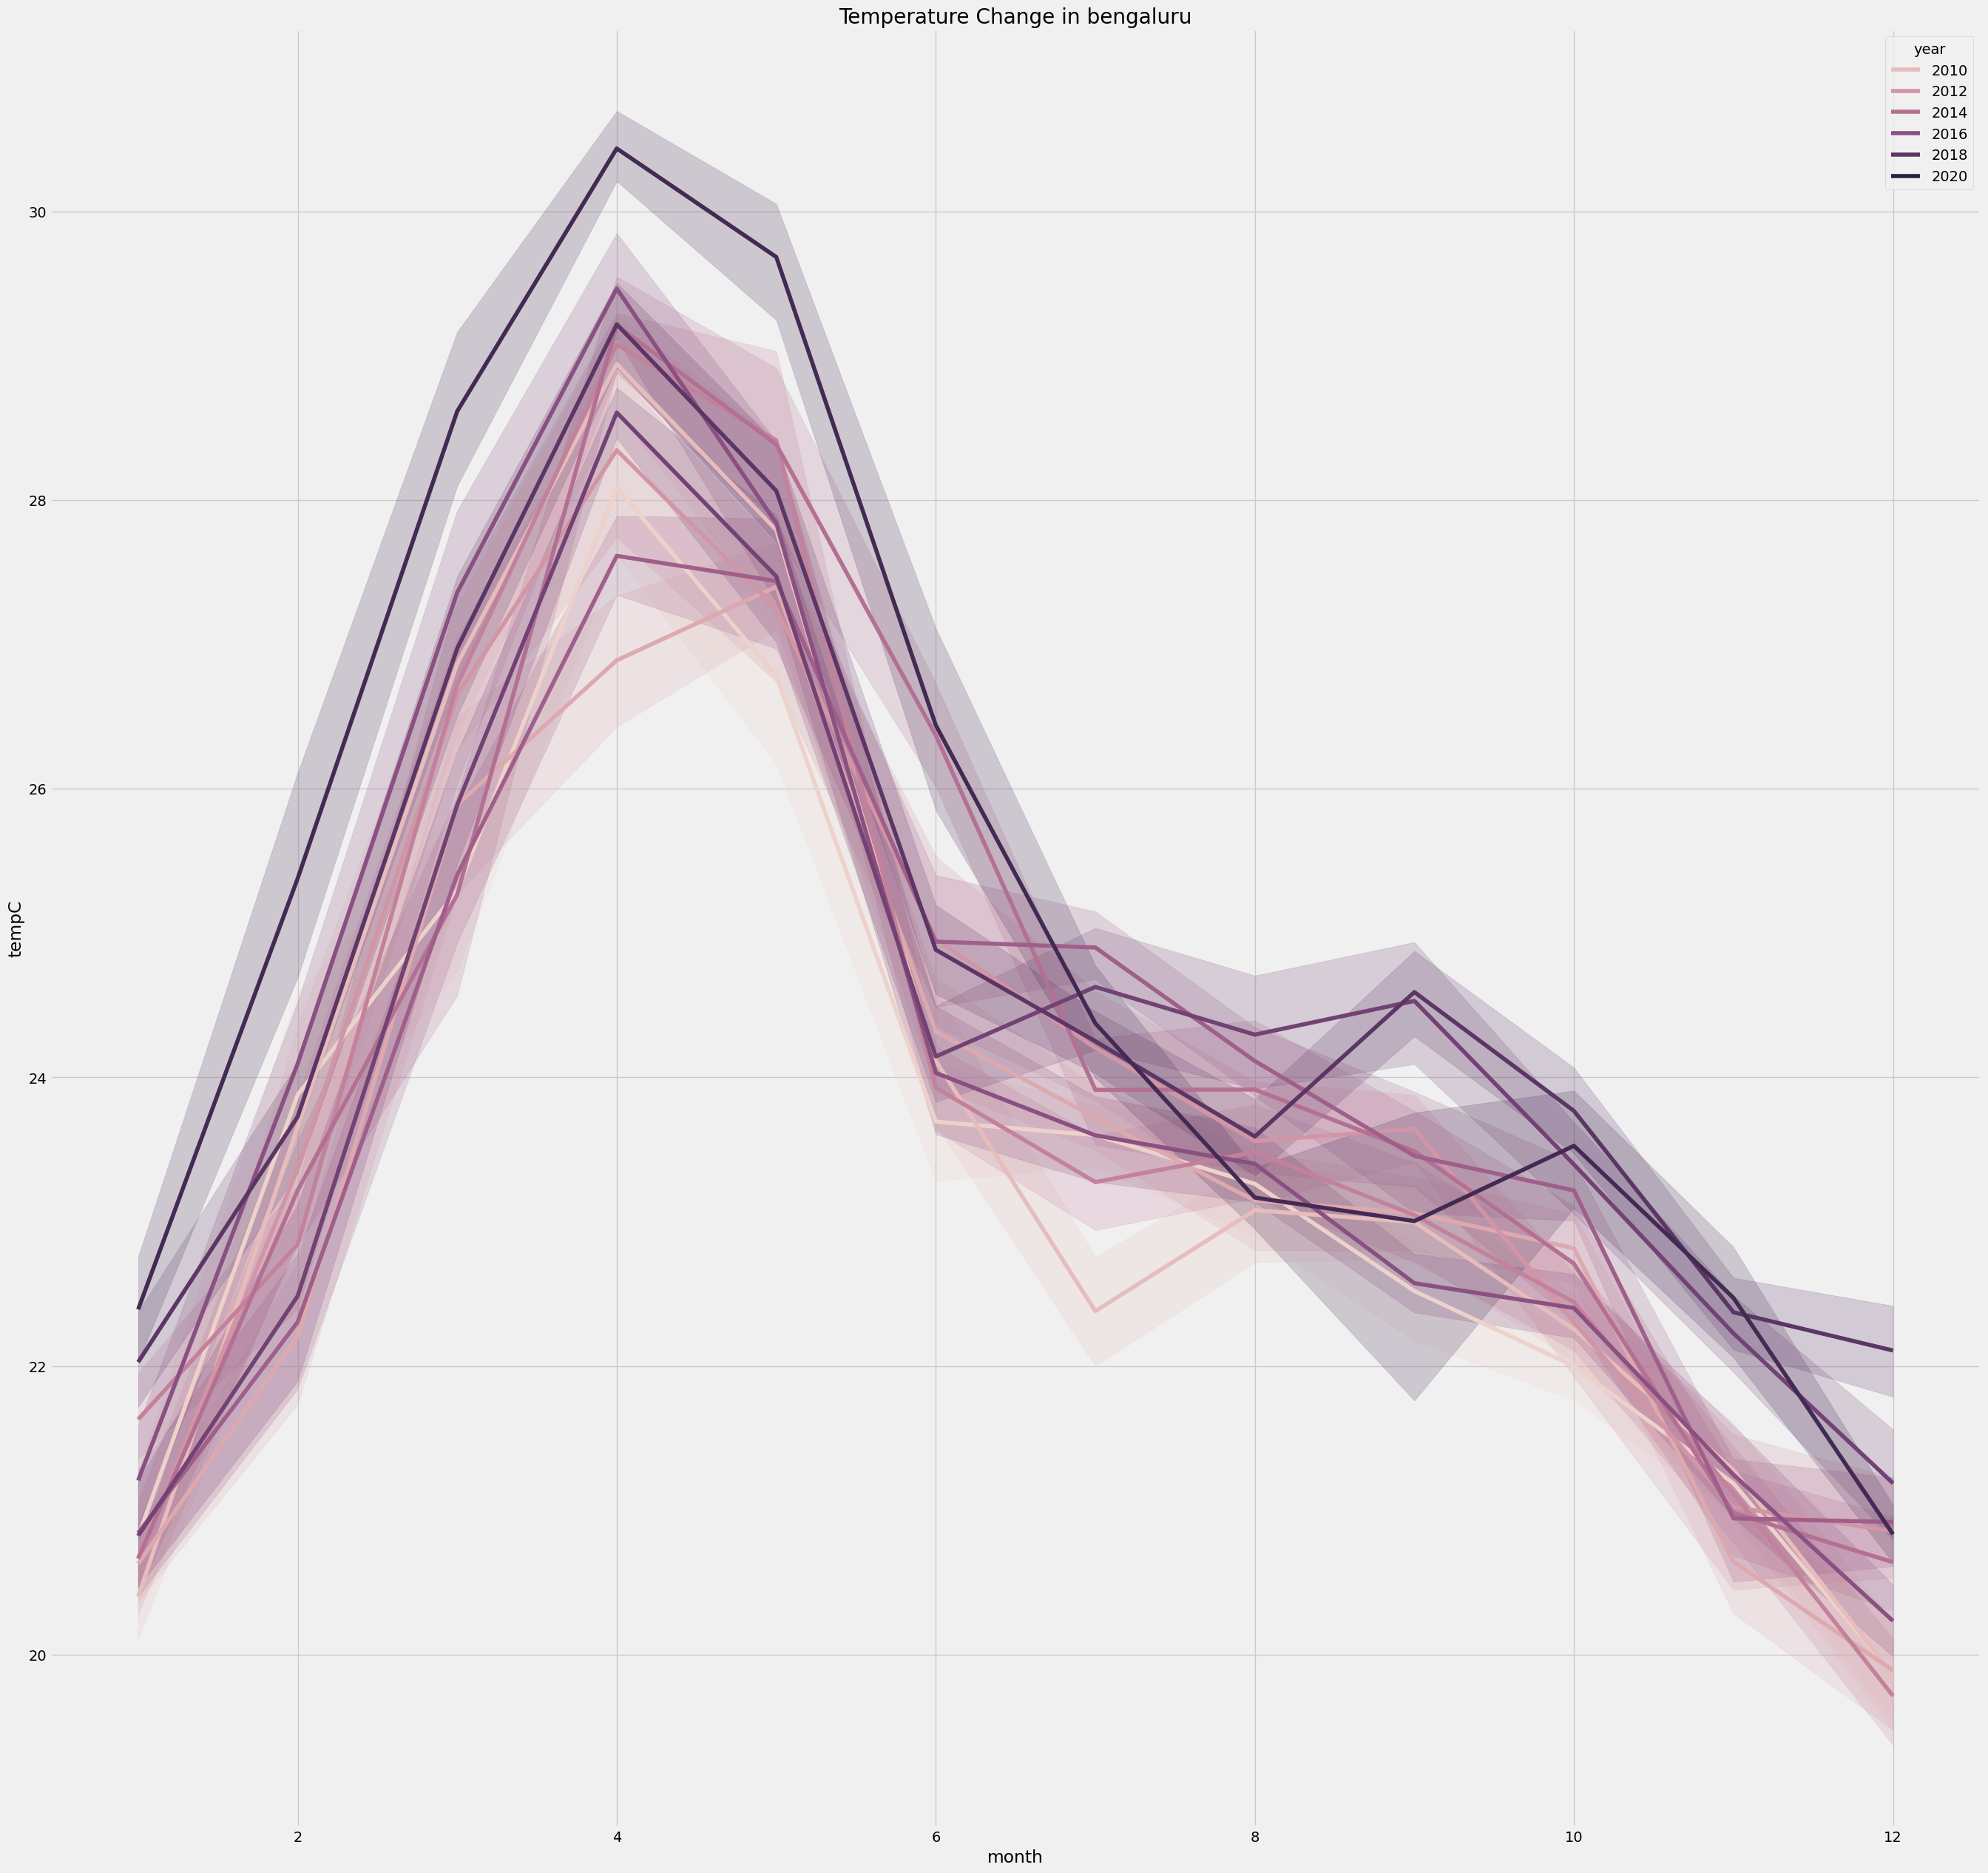

In [128]:

plt.figure(figsize=(30,30))
plt.title("Temperature Change in bengaluru")
sns.lineplot(data = df_daily, x='month', y='tempC', hue='year')
plt.show()

<Axes: >

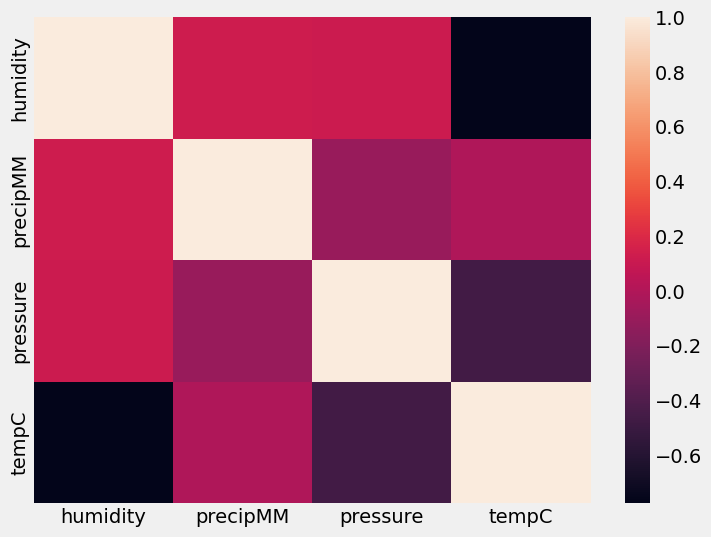

In [129]:
fig, axes=plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), ax=axes)

In [130]:
forecast_data = df_daily.rename(columns = {"datetime": "ds", 
                                       "humidity": "y"})
print(forecast_data)

             ds          y  precipMM     pressure      tempC  year  month
0    2009-01-01  66.500000  0.000000  1013.875000  19.041667  2009      1
1    2009-01-02  69.916667  0.000000  1014.333333  20.625000  2009      1
2    2009-01-03  71.000000  0.000000  1015.000000  20.166667  2009      1
3    2009-01-04  67.291667  0.000000  1014.250000  20.791667  2009      1
4    2009-01-05  67.083333  0.000000  1012.708333  20.666667  2009      1
...         ...        ...       ...          ...        ...   ...    ...
4013 2019-12-28  72.916667  0.000000  1012.916667  21.375000  2019     12
4014 2019-12-29  75.166667  0.033333  1013.875000  20.916667  2019     12
4015 2019-12-30  75.125000  0.000000  1013.708333  20.791667  2019     12
4016 2019-12-31  77.000000  0.000000  1014.416667  21.208333  2019     12
4017 2020-01-01  78.125000  0.120833  1014.625000  21.708333  2020      1

[4018 rows x 7 columns]


In [131]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=730)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)



17:22:24 - cmdstanpy - INFO - Chain [1] start processing
17:22:25 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2009, 1, 1, 0, 0),
                          datetime.datetime(2009, 1, 2, 0, 0),
                          datetime.datetime(2009, 1, 3, 0, 0), ...,
                          datetime.datetime(2019, 12, 30, 0, 0),
                          datetime.datetime(2019, 12, 31, 0, 0),
                          datetime.datetime(2020, 1, 1, 0, 0)], dtype=object),
              'y': array([66.5       , 69.91666667, 71.        , ..., 75.125     , 77.        ,
                          78.125     ])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2009, 1, 1, 0, 0),
                          datetime.datetime(2009, 1, 2, 0, 0),
                          datetime.datetime(2009, 1, 3, 0, 0), ...,
                          datetime.datetime(2021, 12, 29, 0, 0),
                          datetime.datetime(2021, 12, 30, 0, 0),
                          datetime.datetime(2021, 12, 31, 0, 0)], dtype=object),
              'y': array([56.4572729 , 56.65463783, 56.43260711, ..., 55.78589199, 53.82189446,
                          54.88861107])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2009, 1, 1, 0, 0),
                          datetime.datetime(2009, 1, 2, 0, 0),
                          datetime.datetime(2009, 1, 3, 0, 0), ...,
                          datetime.datetime(2021, 12, 29, 0, 0),
                          datetime.datetime(2021, 12, 30, 0, 0),
                          datetime.datetime(2021, 12, 31, 0, 0)], dtype=object),
              'y': array([68.37317178, 68.0124606 , 67.44578686, ..., 66.77596567, 66.0545893 ,
                          65.65722888])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2009, 1, 1, 0, 0),
                          datetime.datetime(2009, 1, 2, 0, 0),
                          datetime.datetime(2009, 1, 3, 0, 0), ...,
                          datetime.datetime(2021, 12, 29, 0, 0),
                          datetime.datetime(2021, 12, 30, 0, 0),
                          datetime.datetime(2021, 12, 31, 0, 0)], dtype=object),
              'y': array([79.71791991, 79.57820042, 78.16081285, ..., 79.17532436, 77.06053798,
                          77.47047986])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangesli